In [2]:
# import libraries and Twitter keys & tokens
import tweepy
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re
import spacy
nlp = spacy.load('en_core_web_lg')

%store -r API_Key
%store -r API_Secret
%store -r Bearer_Token 
%store -r Access_Token
%store -r Access_Token_Secret

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jasminechung/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jasminechung/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# scrape the most recent 100 tweets from Bitcoin Archive 
client = tweepy.Client(bearer_token=Bearer_Token)
response = client.search_recent_tweets(query='from:BTC_Archive lang:en -is:retweet',max_results=100)

# store the tweet texts into a dataframe
tweet_text = []

for tweet in response.data:
    tweet_text.append(tweet.text)
    
data = {'tweet_text':tweet_text}
df = pd.DataFrame(data)

df

,tweet_text
0,@AltcoinGordon 😂😂😂 \nMe and Hasbulla still got...
1,Consensus in replies is overwhelmingly bearish...
2,@noufsmith Yes pls!
3,Will #Bitcoin bounce off these levels a 3rd ti...
4,💥Cathie Wood: Bear market in #Bitcoin and cryp...
...,...
95,@AltcoinGordon then i will show you the secret...
96,@AltcoinGordon Huge if true
97,"#Bitcoin is an asset, not a currency. \n- Swed..."
98,@AltcoinGordon You tonight tho... 😂 https://t....


In [4]:
# split all tweets into individual words
all_words = list()

for index, row in df.iterrows():
    split_tweet = row['tweet_text'].split()
    for s in split_tweet:
        all_words.append(s)


In [5]:
# remove punctuations

all_words = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in all_words]

all_words2 = []

for word in all_words:
    if word != '':
        all_words2.append(word)

In [6]:
# stem the words to their root
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in all_words2:
    stem.append(s_stemmer.stem(word))
    

In [7]:
# remove all stop words

stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)
        

In [8]:
df = pd.DataFrame(stem2)
df = df[0].value_counts()

In [9]:
# count frequencis of the words in tweets
from nltk.probability import FreqDist

freqcounter = FreqDist()

for word in df:
    freqcounter[word] += 1

freqcounter

FreqDist({1: 314, 2: 52, 3: 13, 4: 4, 5: 2, 31: 1, 18: 1, 9: 1, 8: 1, 6: 1})

In [10]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


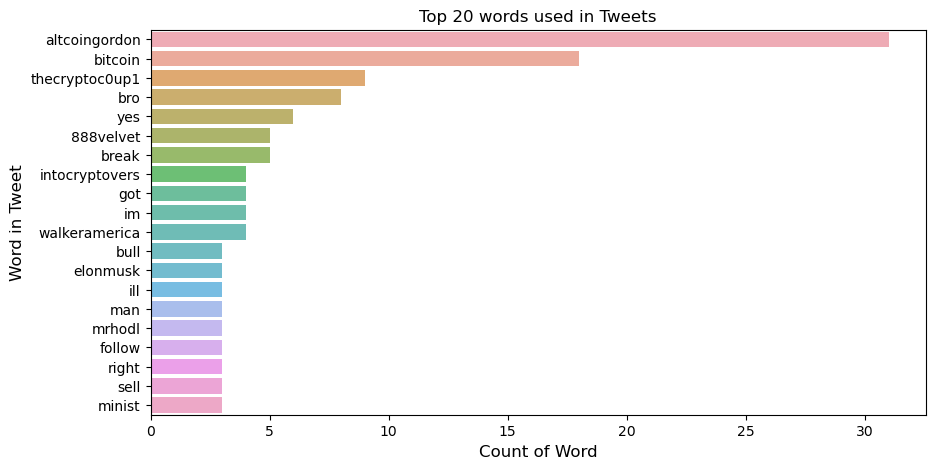

In [11]:
df = df[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top 20 words used in Tweets')
plt.ylabel('Word in Tweet', fontsize =12)
plt.xlabel('Count of Word', fontsize =12)
plt.show()

In [12]:
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [13]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - '+ ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [14]:
# count the most mentioned people in tweets
str1 = " "
stem2 = str1.join(all_words2)

stem2 = nlp(stem2)
label = [(X.text, X.label_) for X in stem2.ents]
df6 = pd.DataFrame(label, columns = ['Word','Entity'])
df7 = df6.where(df6['Entity'] == 'PERSON')
df7 = df7['Word'].value_counts()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


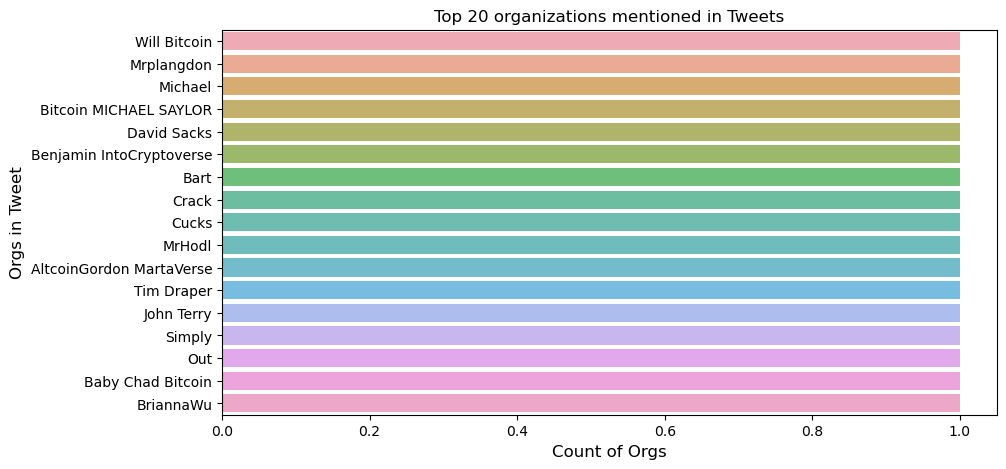

In [15]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top 20 organizations mentioned in Tweets')
plt.ylabel('Orgs in Tweet', fontsize =12)
plt.xlabel('Count of Orgs', fontsize =12)
plt.show()